# Use case of Credidt Card Default

In [1]:
#Upgrade dependencies
!pip install --upgrade pip
!pip install --upgrade scikit-learn

/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 1.5 MB 17.0 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 21.0.1
    Uninstalling pip-21.0.1:
      Successfully uninstalled pip-21.0.1
/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/home/ec2-user/anaconda3/envs/amazonei_tensor

In [2]:
import numpy as np                                
import matplotlib.pyplot as plt   
from IPython.display import Image                 
from IPython.display import display               
from sklearn.datasets import dump_svmlight_file   
from time import gmtime, strftime                 
import sys                                        
import math                                       
import json
import boto3
import sagemaker

bucket = sagemaker.Session().default_bucket()
prefix = 'SageMaker/'
role = sagemaker.get_execution_role()

print('Bucket:\n{}'.format(bucket))


Bucket:
sagemaker-eu-west-1-461627159302


In [3]:
! ls

CreditCardDefault.ipynb  lost+found
data			 mcit-sample-notebook-use-case-1.ipynb


In [62]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
  
df = pd.read_csv('data/default of credit card clients.csv')

print('The shape of the training dataset is:', df.shape)

The shape of the training dataset is: (30000, 25)


In [63]:
# Print the first five rows
# NaN means missing data
df = df.drop("ID", axis=1)
df.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,female,university,married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,female,university,single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,female,university,single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,female,university,married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,male,university,married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,male,graduate school,single,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,male,graduate school,single,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,female,university,single,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,140000,female,others,married,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,male,high school,single,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [64]:
print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (30000, 24)


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   30000 non-null  int64 
 1   SEX                         30000 non-null  object
 2   EDUCATION                   29669 non-null  object
 3   MARRIAGE                    29677 non-null  object
 4   AGE                         30000 non-null  int64 
 5   PAY_0                       30000 non-null  int64 
 6   PAY_2                       30000 non-null  int64 
 7   PAY_3                       30000 non-null  int64 
 8   PAY_4                       30000 non-null  int64 
 9   PAY_5                       30000 non-null  int64 
 10  PAY_6                       30000 non-null  int64 
 11  BILL_AMT1                   30000 non-null  int64 
 12  BILL_AMT2                   30000 non-null  int64 
 13  BILL_AMT3                   30000 non-null  in

In [66]:
df.describe()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.518833,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,9.528019,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,267.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


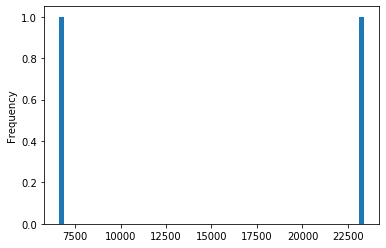

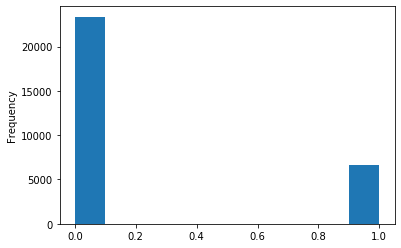

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt

df['default payment next month'].value_counts().plot.hist(bins=70)
plt.show()

df['default payment next month'].plot.hist(bins=10)
plt.show()

Text(0.5, 1, 'dataset correlation')

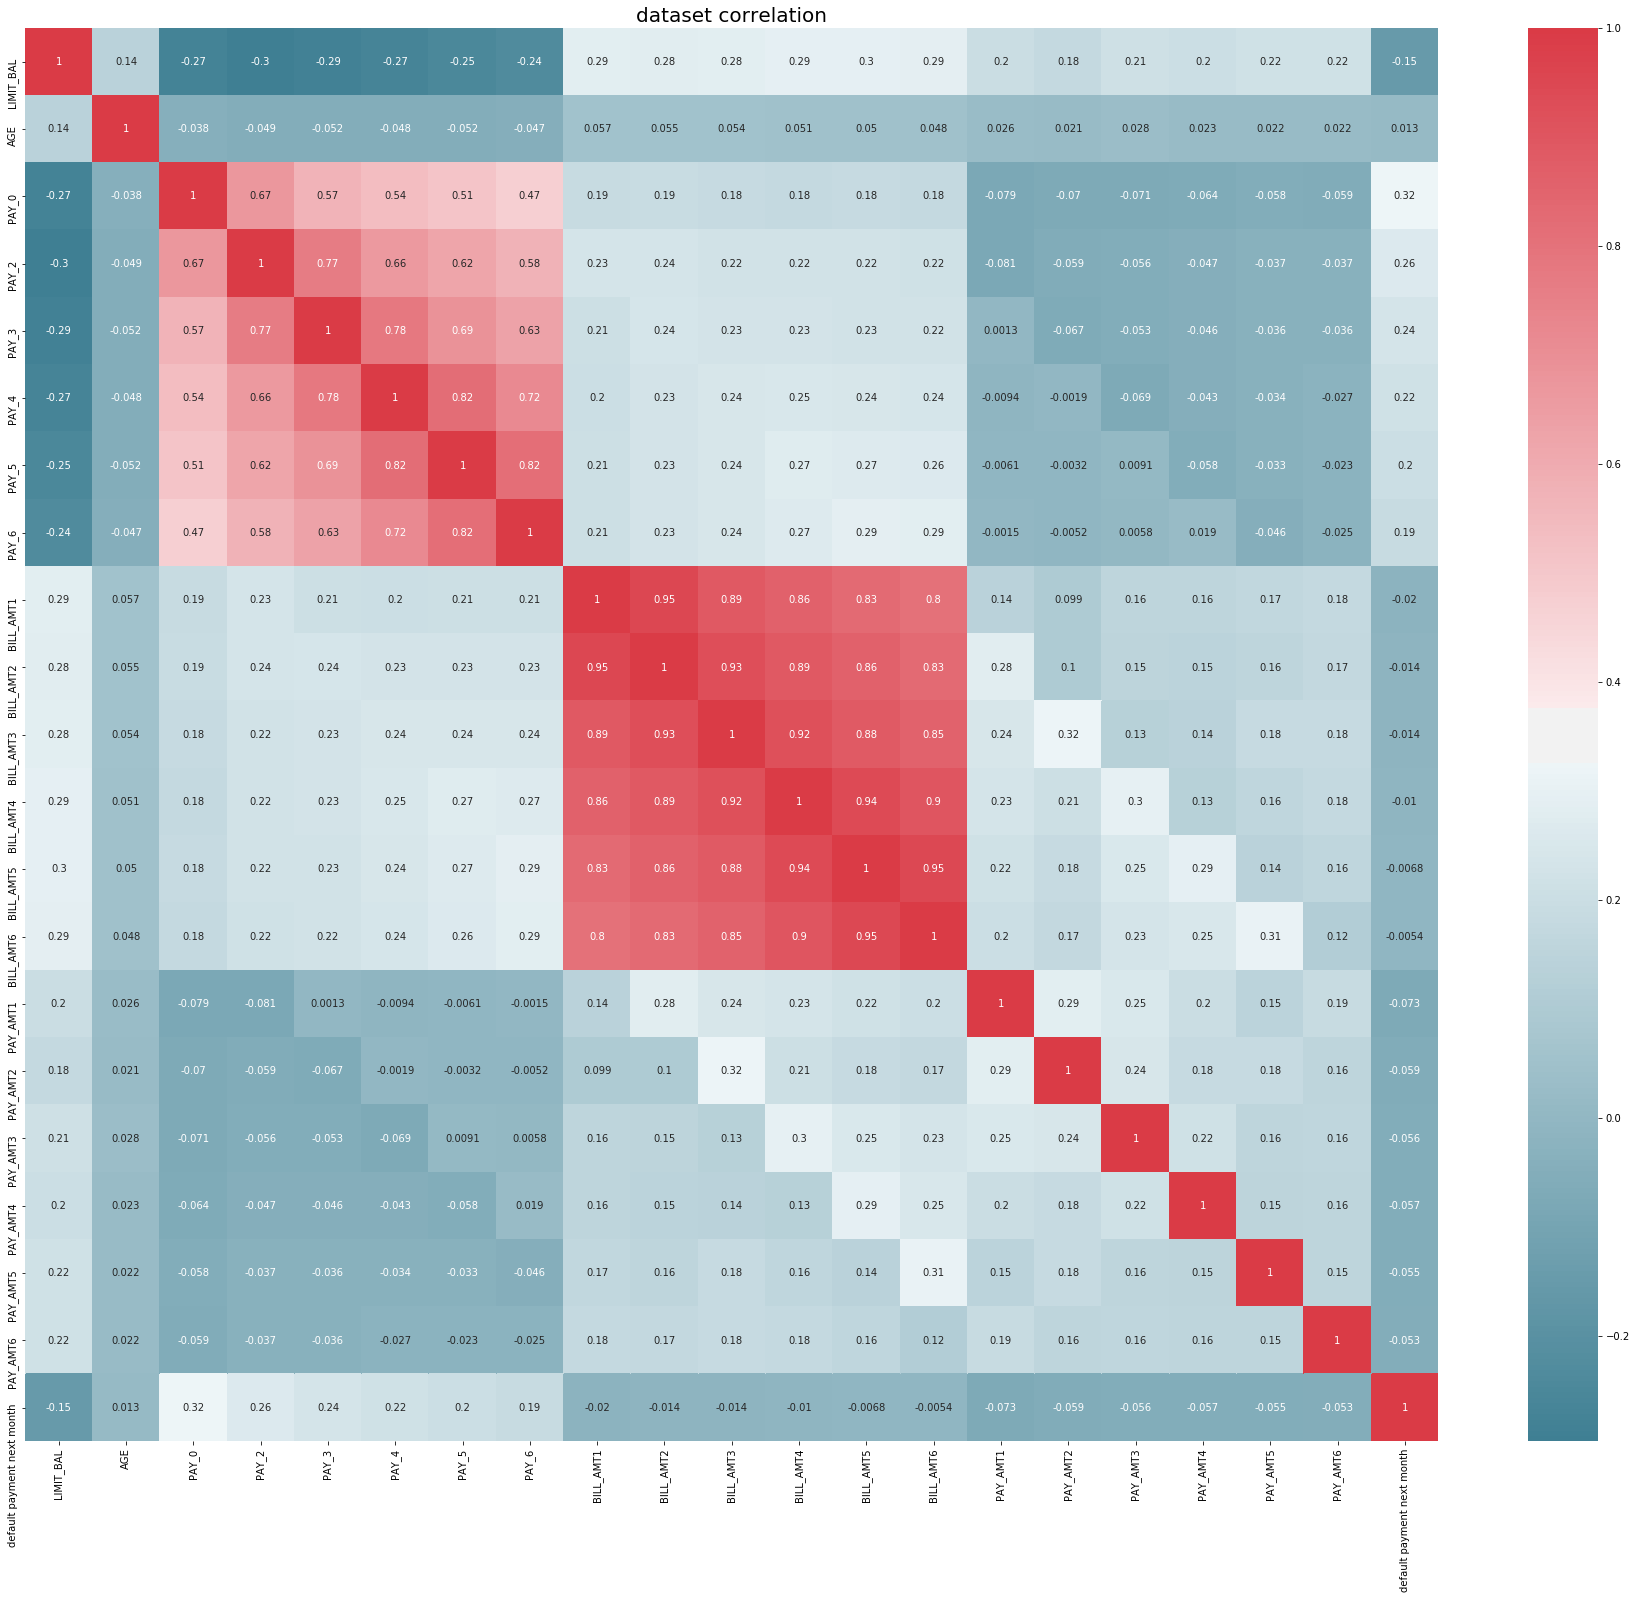

In [68]:
# Display correlation after removing correlated features
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(32, 26))
corr = df.corr()
mp = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)
mp.set_title(label='dataset correlation', fontsize=20)

In [69]:
df=df.drop(["BILL_AMT2","BILL_AMT3","BILL_AMT1","BILL_AMT5","BILL_AMT6"],axis =1)

Text(0.5, 1, 'dataset correlation')

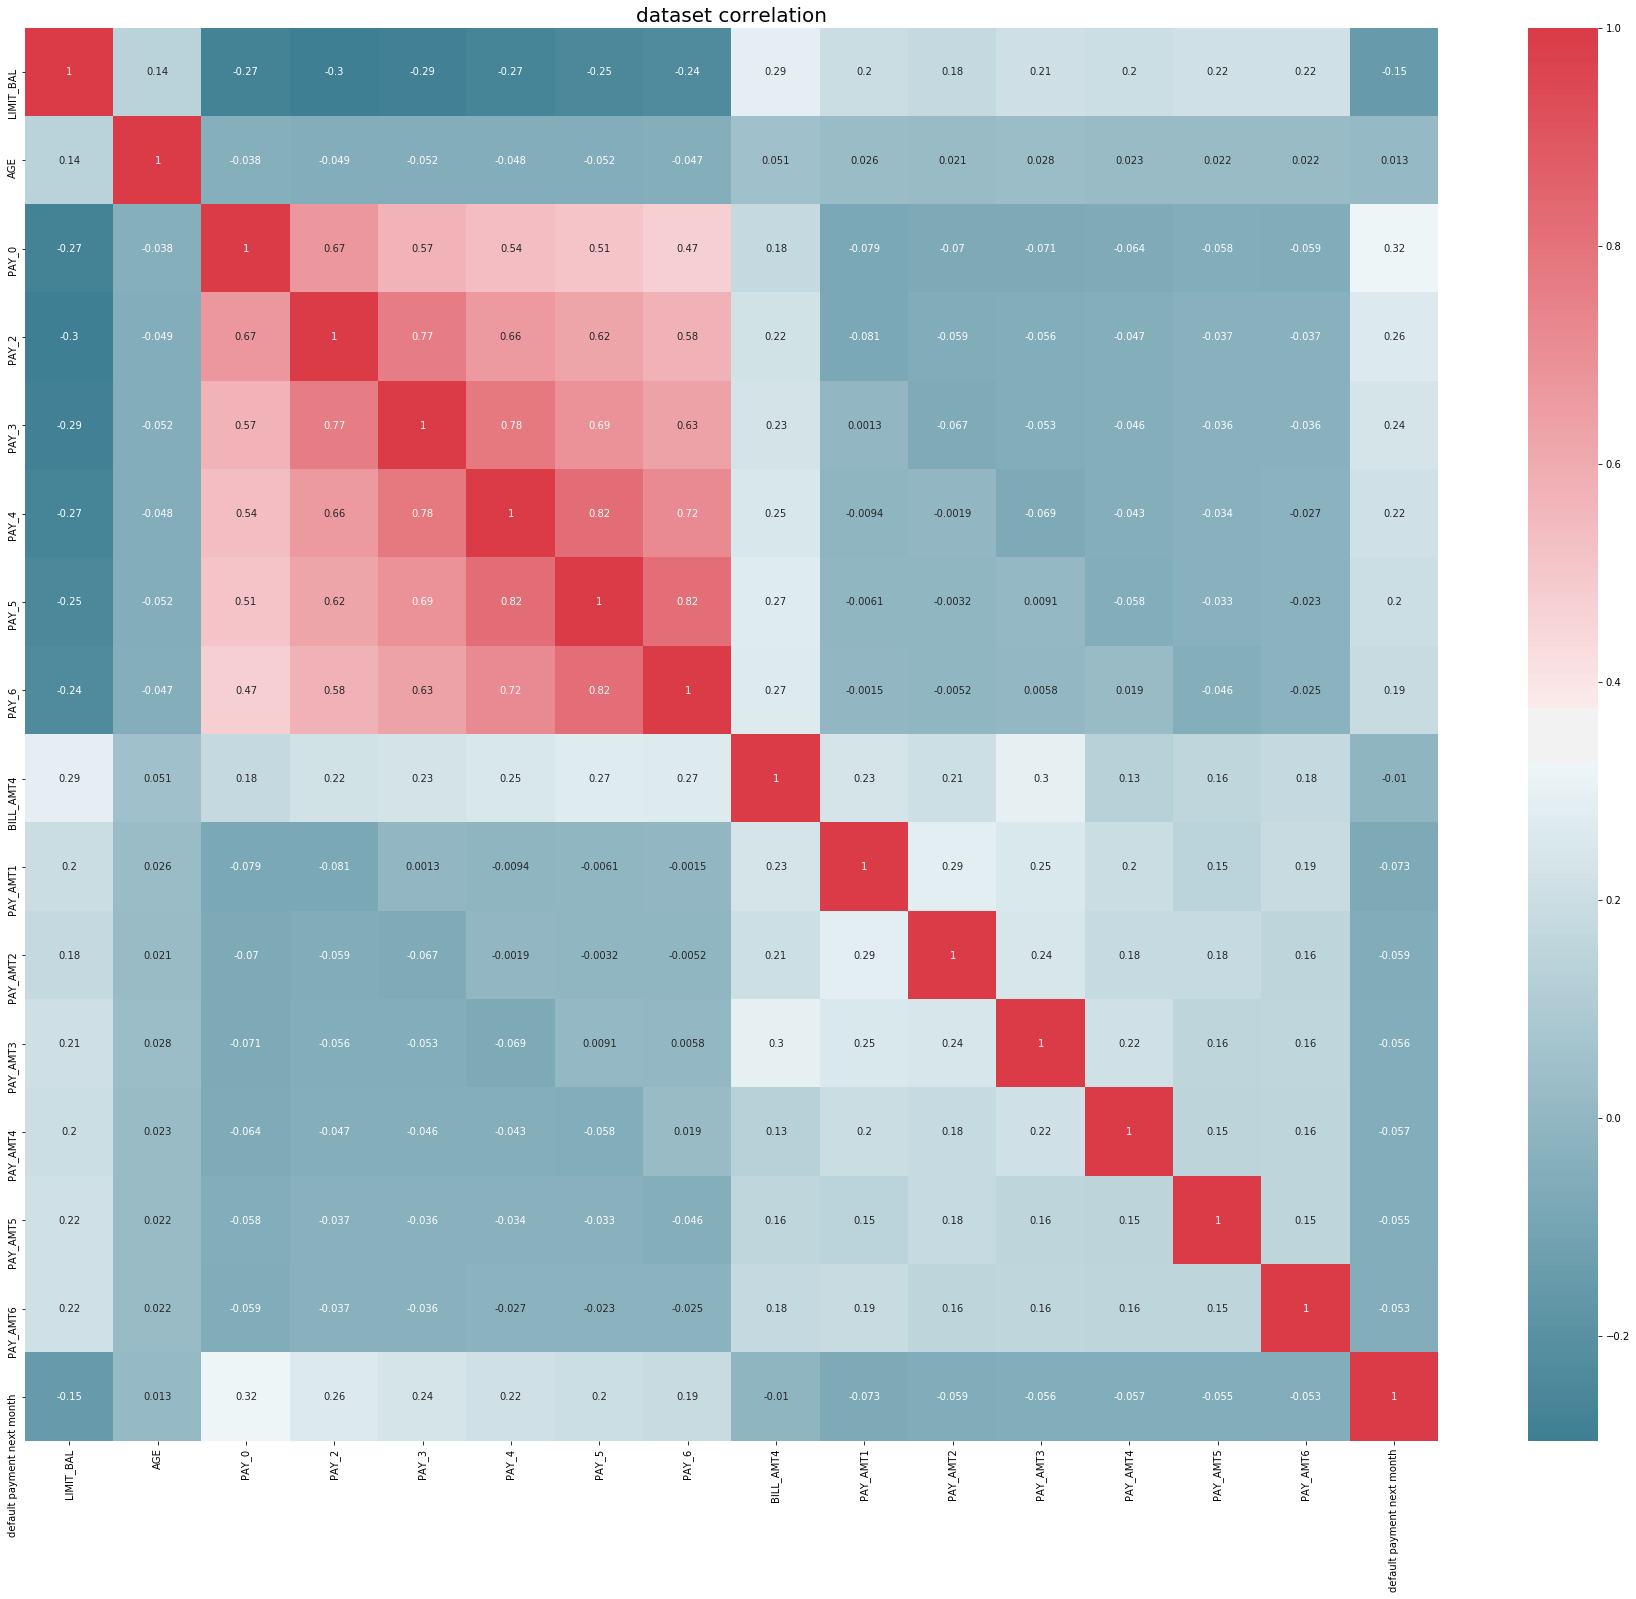

In [70]:
# Display correlation after removing correlated features
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(32, 26))
corr = df.corr()
mp = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)
mp.set_title(label='dataset correlation', fontsize=20)

In [18]:
df.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT4,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,female,university,married,24,2,2,-1,-1,-2,-2,0,0,689,0,0,0,0,1
1,120000,female,university,single,26,-1,2,0,0,0,2,3272,0,1000,1000,1000,0,2000,1
2,90000,female,university,single,34,0,0,0,0,0,0,14331,1518,1500,1000,1000,1000,5000,0
3,50000,female,university,married,37,0,0,0,0,0,0,28314,2000,2019,1200,1100,1069,1000,0
4,50000,male,university,married,57,-1,0,-1,0,0,0,20940,2000,36681,10000,9000,689,679,0
5,50000,male,graduate school,single,37,0,0,0,0,0,0,19394,2500,1815,657,1000,1000,800,0
6,500000,male,graduate school,single,29,0,0,0,0,0,0,542653,55000,40000,38000,20239,13750,13770,0
7,100000,female,university,single,23,0,-1,-1,0,0,-1,221,380,601,0,581,1687,1542,0
8,140000,female,others,married,28,0,0,2,0,0,0,12211,3329,0,432,1000,1000,1000,0
9,20000,male,high school,single,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,1122,0,0


In [19]:


numeric_features = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT4', 'PAY_AMT1', 
                    'PAY_AMT2', 'PAY_AMT3',  'PAY_AMT4',  'PAY_AMT5',  'PAY_AMT6']


text_categorical_features =  ['SEX', 'EDUCATION', 'MARRIAGE']


label_feature = ['default payment next month']

In [79]:
label = 'default payment next month'

In [20]:
#remove duplicates
df.drop_duplicates(inplace=True)

In [21]:
df.shape

(29957, 19)

In [22]:
for c in numeric_features:
    print(c)
    print(df[c].value_counts(bins=10, sort=False))

LIMIT_BAL
(9009.999, 109000.0]     12487
(109000.0, 208000.0]      7865
(208000.0, 307000.0]      5051
(307000.0, 406000.0]      2751
(406000.0, 505000.0]      1597
(505000.0, 604000.0]       127
(604000.0, 703000.0]        56
(703000.0, 802000.0]        22
(802000.0, 901000.0]         0
(901000.0, 1000000.0]        1
Name: LIMIT_BAL, dtype: int64
AGE
(20.753, 45.6]    25287
(45.6, 70.2]       4648
(70.2, 94.8]         15
(94.8, 119.4]         0
(119.4, 144.0]        2
(144.0, 168.6]        2
(168.6, 193.2]        0
(193.2, 217.8]        0
(217.8, 242.4]        2
(242.4, 267.0]        1
Name: AGE, dtype: int64
PAY_0
(-2.0109999999999997, -1.0]     8426
(-1.0, 0.0]                    14736
(0.0, 1.0]                      3666
(1.0, 2.0]                      2666
(2.0, 3.0]                       322
(3.0, 4.0]                        76
(4.0, 5.0]                        26
(5.0, 6.0]                        11
(6.0, 7.0]                         9
(7.0, 8.0]                        19
Name: 

In [23]:
print(df[numeric_features].isna().sum())

LIMIT_BAL    0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT4    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64


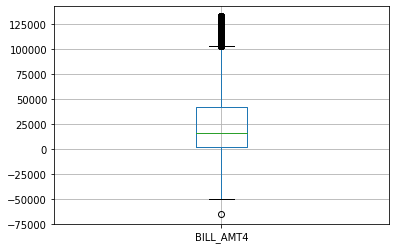

In [55]:
df.boxplot(['BILL_AMT4'])

In [50]:
df2 = df
for x in numeric_features:
    q75,q25 = np.percentile(df2.loc[:,x],[50,50])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df2.loc[df2[x] < min,x] = np.nan
    df2.loc[df2[x] > max,x] = np.nan

NameError: name 'label' is not defined

In [72]:
df_drop_na = df

df_drop_na.dropna(axis=0, inplace= True)

df_drop_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29351 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   29351 non-null  int64 
 1   SEX                         29351 non-null  object
 2   EDUCATION                   29351 non-null  object
 3   MARRIAGE                    29351 non-null  object
 4   AGE                         29351 non-null  int64 
 5   PAY_0                       29351 non-null  int64 
 6   PAY_2                       29351 non-null  int64 
 7   PAY_3                       29351 non-null  int64 
 8   PAY_4                       29351 non-null  int64 
 9   PAY_5                       29351 non-null  int64 
 10  PAY_6                       29351 non-null  int64 
 11  BILL_AMT4                   29351 non-null  int64 
 12  PAY_AMT1                    29351 non-null  int64 
 13  PAY_AMT2                    29351 non-null  in

default payment next month    0
dtype: int64


In [73]:
for c in text_categorical_features:
    print(c)
    print(df_drop_na[c].unique()) #value_counts())

SEX
['female' 'male']
EDUCATION
['university' 'graduate school' 'others' 'high school' '0']
MARRIAGE
['married' 'single' '0']


In [74]:
print(df_drop_na[text_categorical_features].isnull().sum())

SEX          0
EDUCATION    0
MARRIAGE     0
dtype: int64


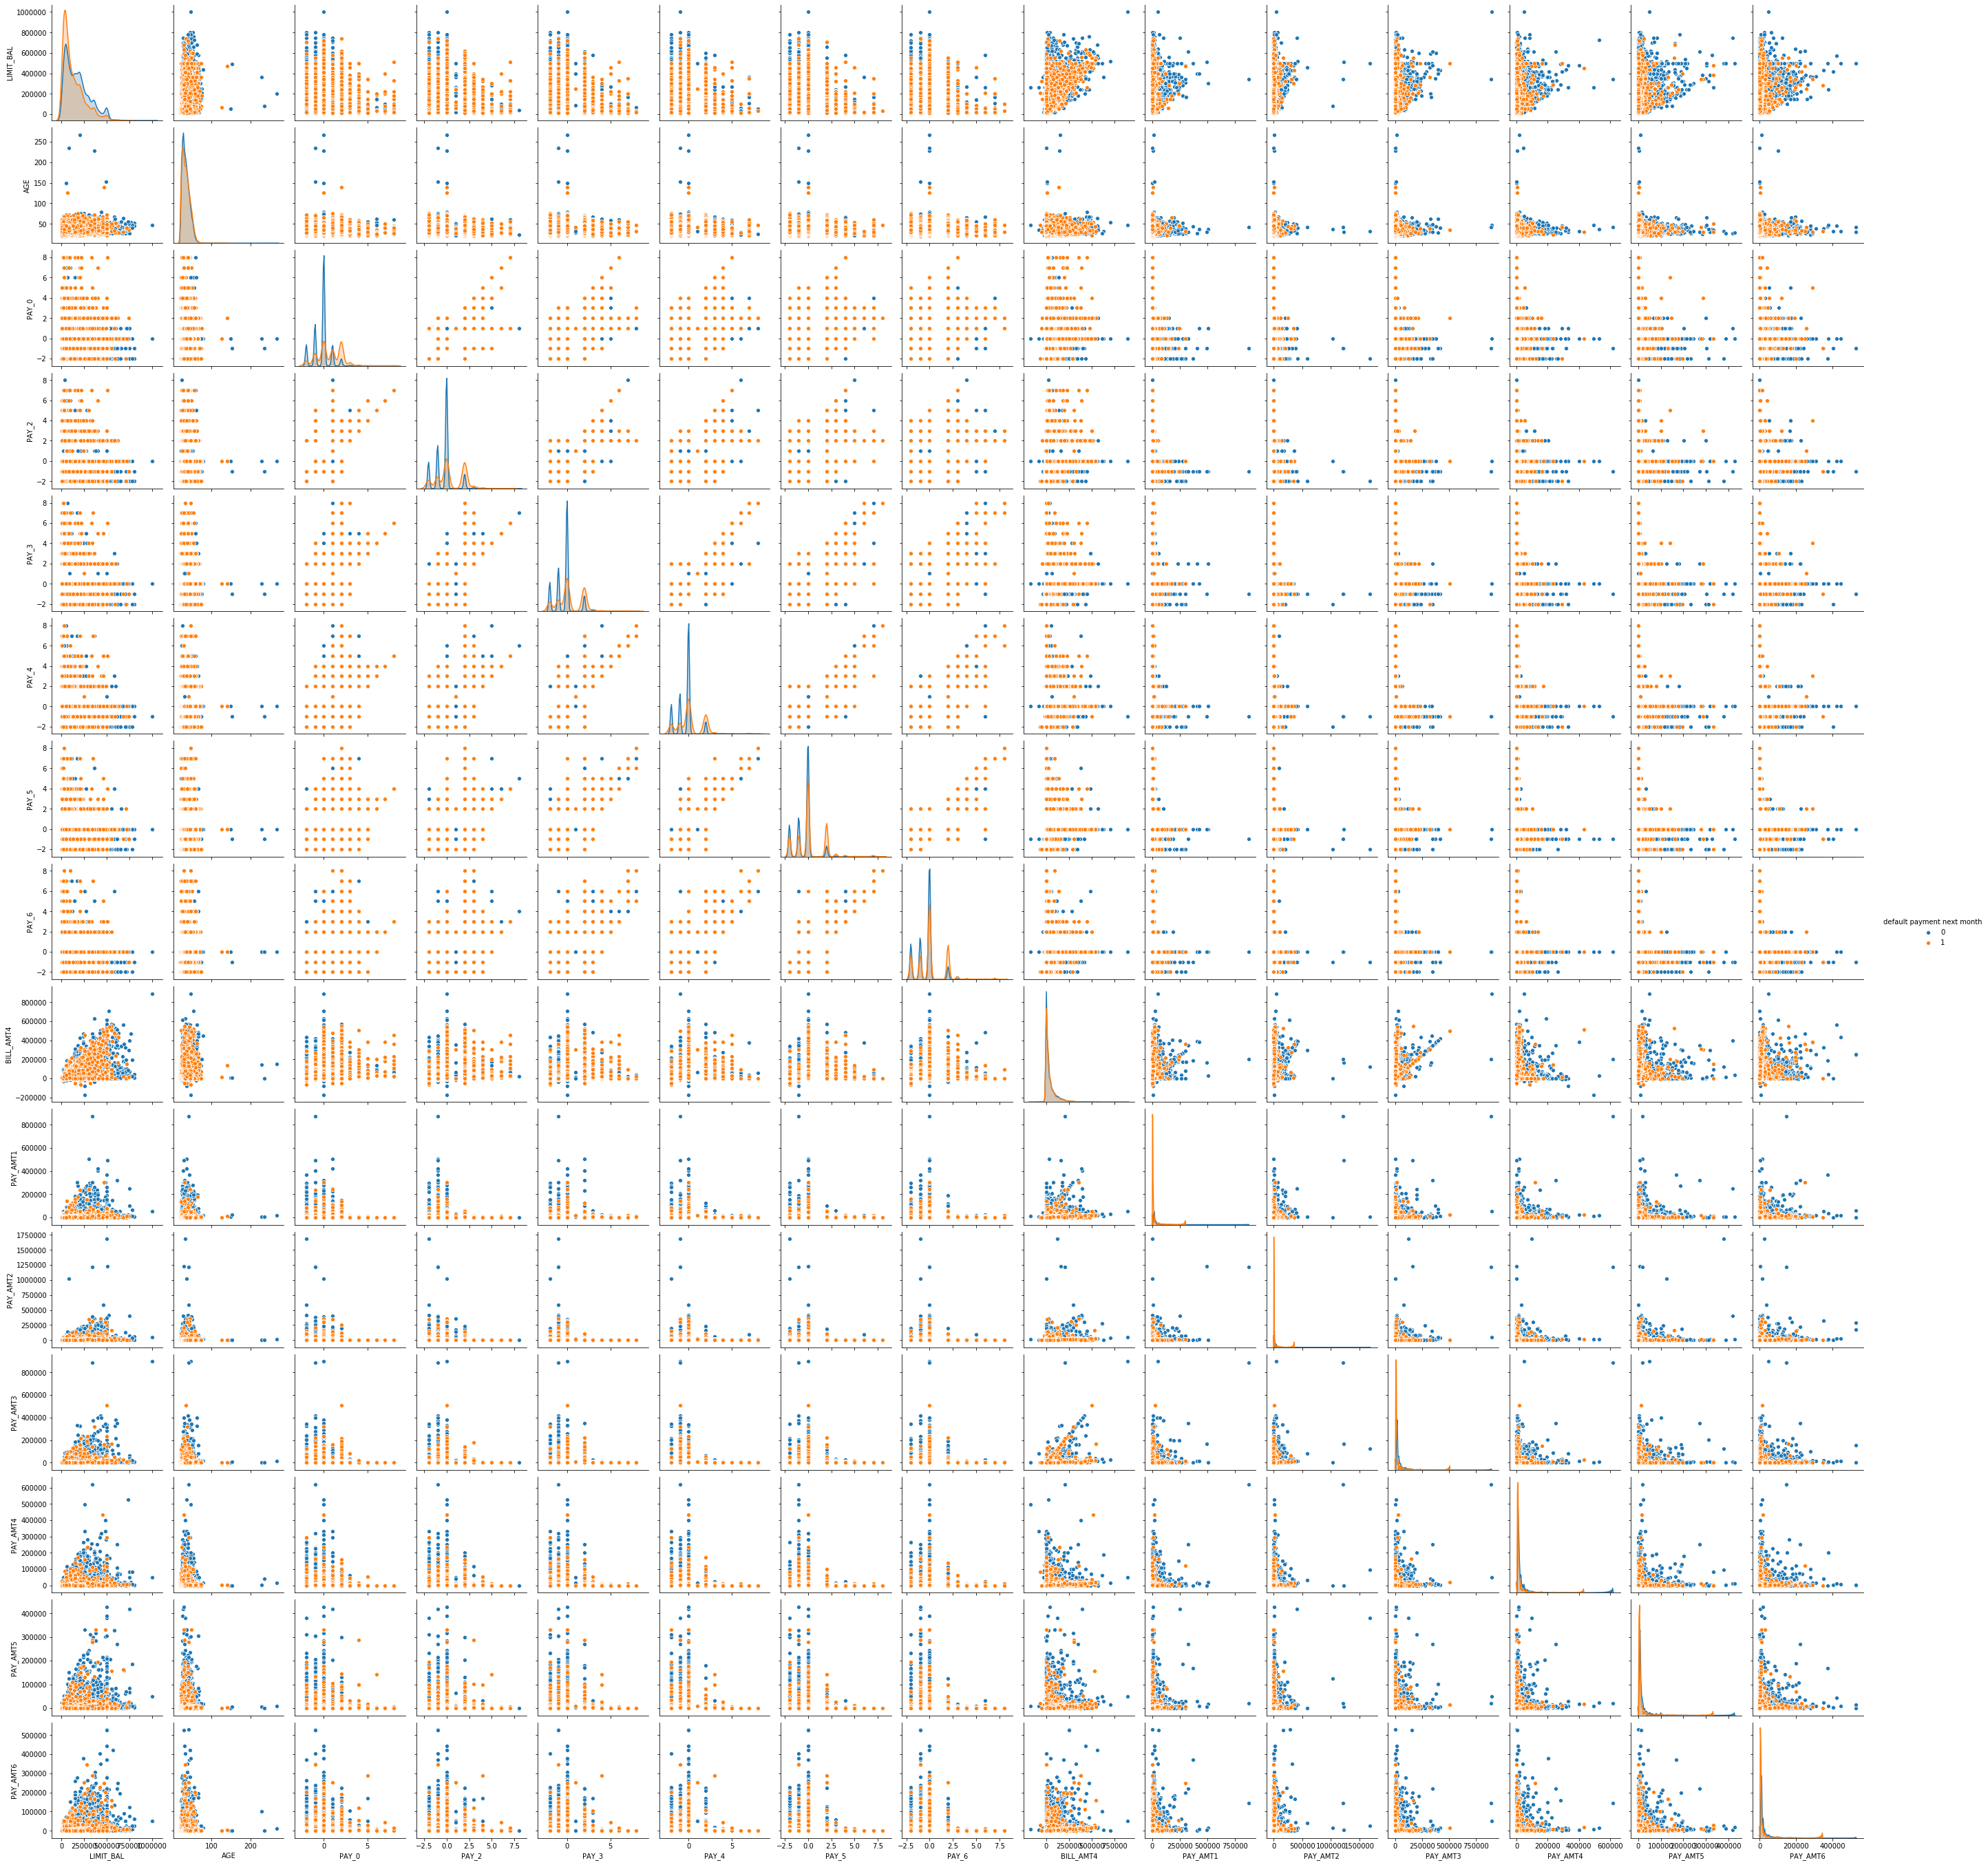

In [45]:
sns.pairplot(df, hue="default payment next month")

In [75]:
df_drop_na_dumm = pd.get_dummies(df_drop_na)
df_drop_na_dumm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29351 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   29351 non-null  int64
 1   AGE                         29351 non-null  int64
 2   PAY_0                       29351 non-null  int64
 3   PAY_2                       29351 non-null  int64
 4   PAY_3                       29351 non-null  int64
 5   PAY_4                       29351 non-null  int64
 6   PAY_5                       29351 non-null  int64
 7   PAY_6                       29351 non-null  int64
 8   BILL_AMT4                   29351 non-null  int64
 9   PAY_AMT1                    29351 non-null  int64
 10  PAY_AMT2                    29351 non-null  int64
 11  PAY_AMT3                    29351 non-null  int64
 12  PAY_AMT4                    29351 non-null  int64
 13  PAY_AMT5                    29351 non-null  int64
 14  PAY_AM

In [82]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df_drop_na_dumm, test_size=0.2, shuffle=True, random_state=23)
val_data, test_data = train_test_split(test_data, test_size=0.2, shuffle=True, random_state=23)

[[17768   521]
 [ 2899  2292]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     18289
           1       0.81      0.44      0.57      5191

    accuracy                           0.85     23480
   macro avg       0.84      0.71      0.74     23480
weighted avg       0.85      0.85      0.84     23480

Accuracy (training): 0.854344122657581
[[842  53]
 [184  96]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       895
           1       0.64      0.34      0.45       280

    accuracy                           0.80      1175
   macro avg       0.73      0.64      0.66      1175
weighted avg       0.78      0.80      0.77      1175

Accuracy (test): 0.7982978723404255


Text(0.5, 1, 'Confusion Matrix')

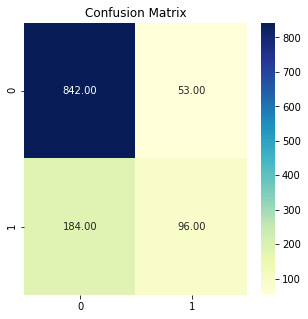

In [84]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


pipeline = Pipeline([
    ('dt', RandomForestClassifier(max_depth=10, random_state=0))
                    ])

# Get train data to train the pipeline
X_train = train_data.loc[:, train_data.columns != label]
y_train = train_data[label]

# Fit the Pipeline to training data
pipeline.fit(X_train, y_train)

# Use the fitted pipeline to make predictions on the train dataset
train_predictions = pipeline.predict(X_train)

#this is for binary classification
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Accuracy (training):", accuracy_score(y_train, train_predictions))


# Get test data to test the pipeline
X_test = test_data.loc[:, train_data.columns != label]
y_test = test_data[label]

# Use the fitted pipeline to make predictions on the test dataset
test_predictions = pipeline.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print("Accuracy (test):", accuracy_score(y_test, test_predictions))

plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='.2f', cmap="YlGnBu").set_title('Confusion Matrix') 


# trying to balance the classes

In [86]:
!pip install imblearn



/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 206 kB 22.3 MB/s eta 0:00:01


In [87]:
from imblearn.over_sampling import SMOTE 

X = df_drop_na_dumm .drop(label, axis=1).values
y = df_drop_na_dumm[label].values

sm = SMOTE(random_state=35)
X_res, y_res = sm.fit_resample(X, y)

In [88]:
smote_df = pd.DataFrame(X_res,columns = df_drop_na_dumm.drop(label, axis=1).columns) 
smote_df[label] = y_res

[[16894  1318]
 [ 3421 14887]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88     18212
           1       0.92      0.81      0.86     18308

    accuracy                           0.87     36520
   macro avg       0.88      0.87      0.87     36520
weighted avg       0.88      0.87      0.87     36520

Accuracy (training): 0.8702354874041621
[[837  84]
 [190 715]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       921
           1       0.89      0.79      0.84       905

    accuracy                           0.85      1826
   macro avg       0.85      0.85      0.85      1826
weighted avg       0.85      0.85      0.85      1826

Accuracy (test): 0.8499452354874042


Text(0.5, 1, 'Confusion Matrix')

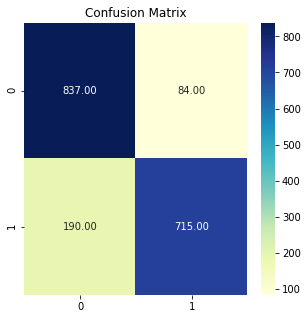

In [89]:

train_data, test_data = train_test_split(smote_df, test_size=0.2, shuffle=True, random_state=23)
val_data, test_data = train_test_split(test_data, test_size=0.2, shuffle=True, random_state=23)

pipeline = Pipeline([
    ('dt', RandomForestClassifier(max_depth=10, random_state=0))
                    ])

# Get train data to train the pipeline
X_train = train_data.loc[:, train_data.columns != label]
y_train = train_data[label]

# Fit the Pipeline to training data
pipeline.fit(X_train, y_train)

# Use the fitted pipeline to make predictions on the train dataset
train_predictions = pipeline.predict(X_train)

#this is for binary classification
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Accuracy (training):", accuracy_score(y_train, train_predictions))


# Get test data to test the pipeline
X_test = test_data.loc[:, train_data.columns != label]
y_test = test_data[label]

# Use the fitted pipeline to make predictions on the test dataset
test_predictions = pipeline.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print("Accuracy (test):", accuracy_score(y_test, test_predictions))

plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='.2f', cmap="YlGnBu").set_title('Confusion Matrix') 
